# An Example of Data Science work on Titanic Dataset

## A Guide on how to perform different feature engineering tasks
 

 
 
##### We will start from exploring the data to see what we have to do clean the provided data set. "Always consider in any data science problem we have to perform some exploratory data analysis as first steps" (if data is readily available, if its not like for data mining strategy will be a bit different)



##### it is important to have a clear understanding of what libs you will be using and import/install them beforehand 

In [1]:
#important libraries
import numpy as np 
import pandas as pd

%matplotlib inline 
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns

import string
import warnings
warnings.filterwarnings('ignore')

#### Explanations:
##### %matplotlib inline:
##### is specifically used here for jupyter notebook to store plots in notebook document 

##### warnings: 
#####    has been imported to avoid raise of warning when a function is deprecated

##### The main reason to have seaborn apart from matplot lib is It is used to create more attractive and informative statistical graphics

In [2]:
# Importing provided dataset one for prediction and one for training and testing
test_frame = pd.read_csv("test.csv")
train_frame = pd.read_csv("train.csv")

In [3]:
train_frame.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


##### Note:

##### shape function provide number of rows and column in a given dataset like (rows, cols)

In [4]:
print(train_frame.shape)
print(test_frame.shape)

(891, 12)
(418, 11)




##### so our train and pred data have 891 and 418 rows and 12 and 11 cols respectively, df_pred has obviously 1 col less because that is the target col which we have to predict

In [5]:
# to see what types of data each col contains
train_frame.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

##### Explanation:
##### Dataframe.Describe()

##### provide a good EDA understanding of the dataset in hand, it provide mean, std and fragments of each 25% and is good to have a glimpse of outliers in data prior to visualzations

In [6]:
train_frame.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Dataframe.describe(include='all') is used to provide information about categorical data. This helps us to identify what categories we are seeing the most 

In [7]:
#include all provide an understanding of category in form of unique values in each col and freq of most common value
train_frame.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Cardeza, Mr. Thomas Drake Martinez",male,NaN,NaN,NaN,347082,NaN,G6,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


##### Lets check how many null/missing values we have in both dataset so we can define our strategy of how to treat them

In [8]:
train_null = train_frame.isnull().sum().sort_values(ascending=False)
train_null

Cabin          687
Age            177
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [9]:
null_test = test_frame.isnull().sum().sort_values(ascending=False)
null_test

Cabin          327
Age             86
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

In [10]:
#performing EDA 
train_frame['Parch'].value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

#### Note:
##### The main reason behind employing visualization is because it is helpful in understanding data/distributions by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be worked with

In [11]:
#initial visualization, droping missing rows to avoid errors in visuals
male = train_frame[train_frame['Sex']=='male']
female = train_frame[train_frame['Sex']=='female']
x = male[male['Survived']==1].Age.dropna()
x1 = male[male['Survived']==0].Age.dropna()
y = female[female['Survived']==1].Age.dropna()
y1 = female[female['Survived']==0].Age.dropna()

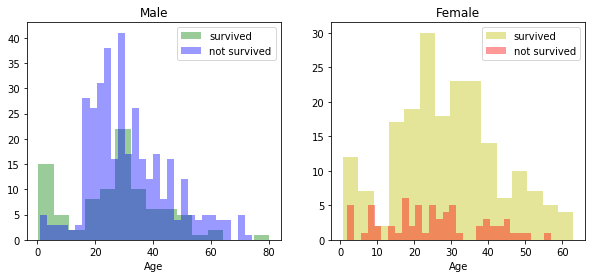

In [12]:
#lets have some visualization on sex and survial ratio

fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 4))
ax = sns.distplot(x, bins=15, label = 'survived', ax = axes[0], kde = False, color = 'g')
ax = sns.distplot(x1, bins=30, label = 'not survived', ax = axes[0], kde = False, color = 'b')
ax.legend()
ax.set_title('Male')
ax = sns.distplot(y, bins=15, label = 'survived', ax = axes[1], kde = False, color = 'y')
ax = sns.distplot(y1, bins=30, label = 'not survived', ax = axes[1], kde = False, color = 'r')
ax.legend()
ax.set_title('Female')
plt.show()

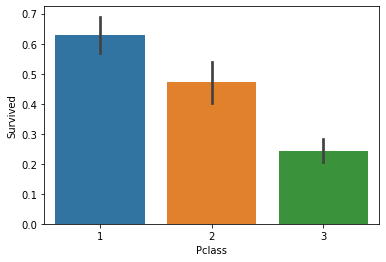

In [15]:
#survival ration w.r.t to class
sns.barplot(x='Pclass', y='Survived', data=train_frame)

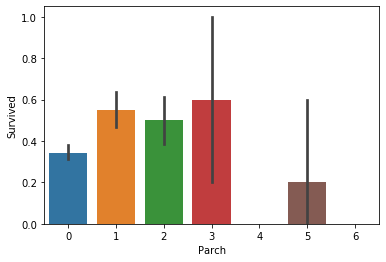

In [17]:
sns.barplot(x='Parch', y='Survived', data=train_frame)

In [12]:
dft1 = train_frame.copy()
cat_cols = ['Sex', 'Embarked', 'Survived']

dft1[cat_cols]= dft1[cat_cols].astype('category')

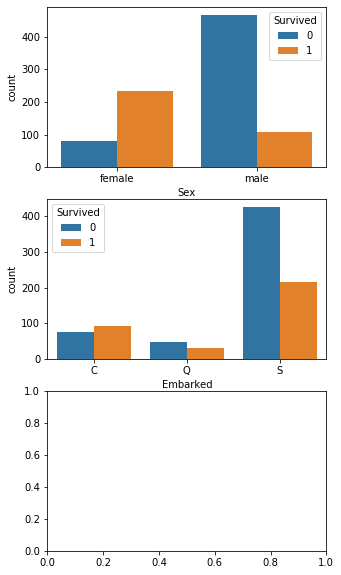

In [13]:
f,ax =plt.subplots(len(cat_cols),1,figsize=(5,10))
for idx,col in enumerate(cat_cols):
    if col!='Survived':
        sns.countplot(x=col,data=dft1[cat_cols],hue='Survived', ax=ax[idx])

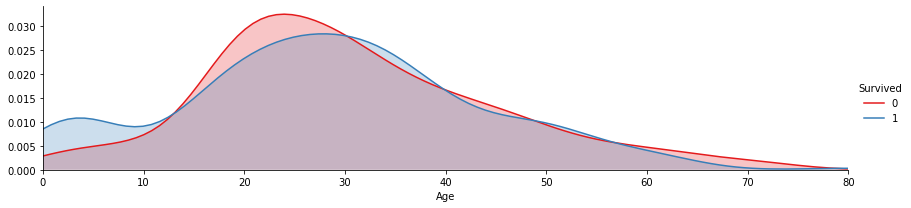

In [26]:
#Advance Vis
a = sns.FacetGrid(train_frame, hue = 'Survived', aspect=4, palette="Set1" )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , train_frame['Age'].max()))
a.add_legend()

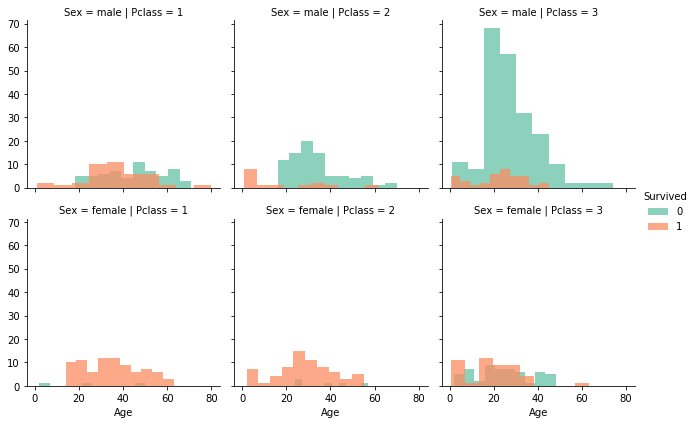

In [27]:
b = sns.FacetGrid(train_frame, row = 'Sex', col = 'Pclass', hue = 'Survived', palette="Set2")
b.map(plt.hist, 'Age', alpha = .75)
b.add_legend()

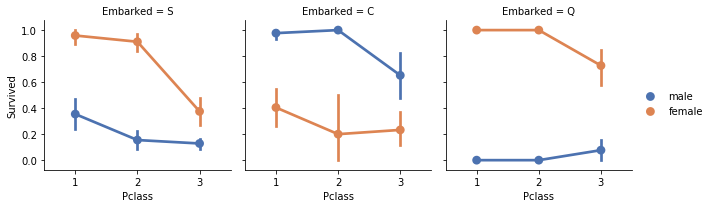

In [28]:
add_1 = sns.FacetGrid(train_frame, col = 'Embarked')
add_1.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
add_1.add_legend()

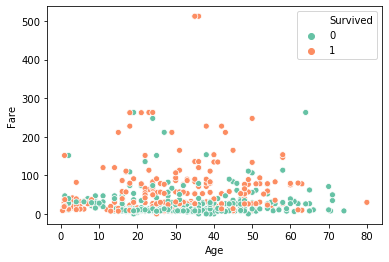

In [31]:
sns.scatterplot(x="Age", y="Fare",
                     hue="Survived", palette="Set2",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=train_frame)

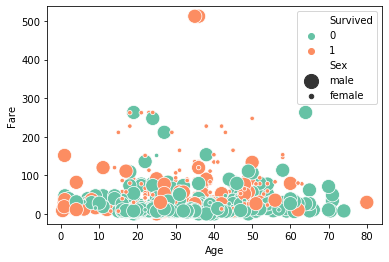

In [32]:
sns.scatterplot(x="Age", y="Fare", hue="Survived", size="Sex", palette="Set2",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=train_frame)

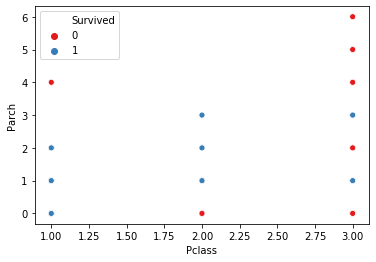

In [36]:
sns.scatterplot(x="Pclass", y="Parch",
                     hue="Survived", palette="Set1",
                     sizes=(20, 200), hue_norm=(0, 7),
                     legend="full", data=train_frame)

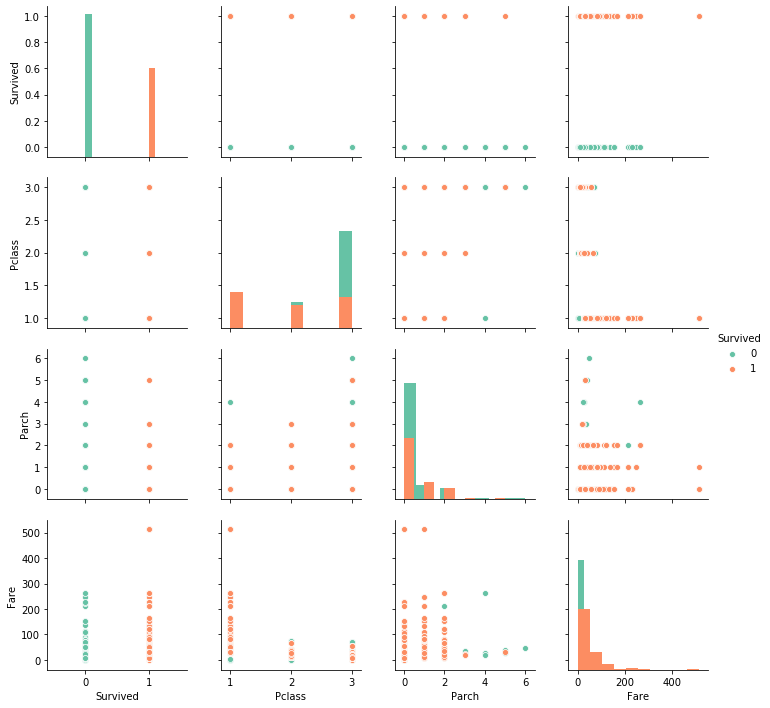

In [43]:
cols = ['Survived', 'Pclass', 'Sex', 'Parch', 'Fare', 'Embarked']
sns.pairplot(train_frame[cols], diag_kind="hist", hue = 'Survived', palette="Set2")

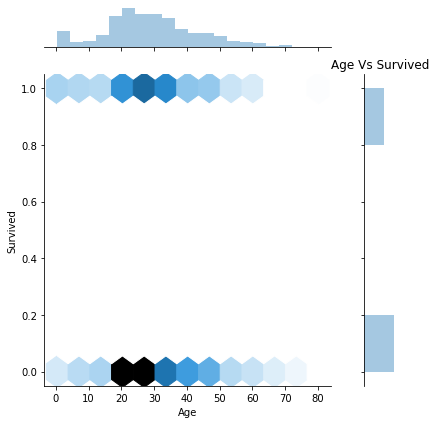

In [54]:
sns.jointplot(train_frame['Age'],train_frame['Survived'], kind="hex")
plt.title('Age Vs Survived')
plt.tight_layout()
plt.show()

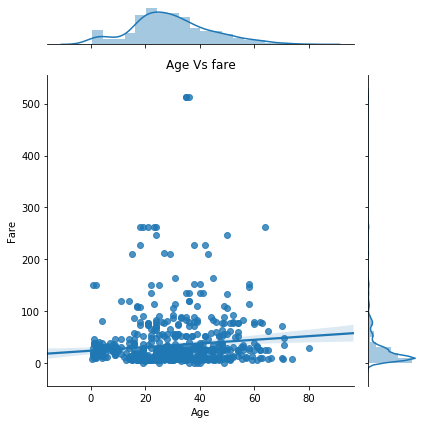

In [58]:
sns.jointplot(train_frame['Age'],train_frame['Fare'], kind="reg")
plt.title('Age Vs fare')
plt.tight_layout()
plt.show()

#### Note: 
##### We now have some understanding of what we are expecting from different features like for 'Parch' we have decision boundires for survial indications of which classes are going with 100% survival and which are with 0% and so on.

## Working on Mising data

#### Explanation:
##### Filling missing values in dataset is of utmost importance because the fate and accuracy of your model rely heavily on your strategy. There are numerous ways for filling your missing data with most easy is to replace it by mean/median or most common value.

#### What we will do
##### Here i have taken 3 dif strategies just for knowledge sharing as how we can fill nan/missing values. 



#### 1. Filling NaN with Mean and Standard Deviation

#### 2. Imputations using simple impute/KNN

#### 3. Using statistics to fill NaN 

#### Note: 
##### sometime it is wise to drop missing data rows/cols mainly when there are too much nan values or if filling them not make any sense. This is part where our understanding of statistics and visualization skills provide us the insights about how to deal with your datset

In [59]:
df_train1 = train_frame.copy()
df_test1 = test_frame.copy()

### 1. Taking mean & std 

##### Since Age feature has the most num of NaN, easiest way is to take mean and fill is by +,_ of its std 

In [60]:
Age = [df_train1, df_test1]

for dataset in Age:
    #making use of both test and train frame
    mean = train_frame["Age"].mean()
    std = test_frame["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # computing random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated in range of mean +/- std
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = df_train1["Age"].astype(int)
df_train1["Age"].isnull().sum()

0

#### Note:
##### This is not the most intelligent or accurate approach since there are different groups w.r.t to pclass, embarked and etc so the model understanding will be biased. So we will not be continuing with this approach

In [61]:
#re-checking if any nulls of Age feautes 
train_null = df_train1.isnull().sum().sort_values(ascending=False)
train_null

Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

### 2. Imputations


##### Imputation is the process of replacing missing data with substituted values

#### Imputations can be performed in many ways as describe below:

##### SimpleFill: Replaces missing entries with the mean or median of each column.

##### •KNN: Nearest neighbor imputations which weights samples using the mean squared difference on features for which two rows both have observed data.

##### •SoftImpute: Matrix completion by iterative soft thresholding of SVD decompositions. Inspired by the softImpute package for R, which is based on Spectral Regularization Algorithms for Learning Large Incomplete Matrices by Mazumder et. al.

##### •IterativeSVD: Matrix completion by iterative low-rank SVD decomposition. Should be similar to SVDimpute from Missing value estimation methods for DNA microarrays by Troyanskaya et. al.

##### •MICE: Reimplementation of Multiple Imputation by Chained Equations.

##### •MatrixFactorization: Direct factorization of the incomplete matrix into low-rank U and V, with an L1 sparsity penalty on the elements of U and an L2 penalty on the elements of V. Solved by gradient descent.

##### •NuclearNormMinimization: Simple implementation of Exact Matrix Completion via Convex Optimization by Emmanuel Candes and Benjamin Recht using cvxpy. Too slow for large matrices.

##### •BiScaler: Iterative estimation of row/column means and standard deviations to get doubly normalized matrix. Not guaranteed to converge but works well in practice. Taken from Matrix Completion and Low-Rank SVD via Fast Alternating Least Squares.

##### For learning purpose will use 2 imputations Simple Impute and KNN since others are out of context for this task
##### (You are free to experiment with others as this improve your understanding of different process)

#### 2.1 Imputing Using Simple Impute

In [6]:
df1 = train_frame['Age'].isnull()
df2 = pd.DataFrame(df1)
df2.columns = ["new"]
df2.head()

,new
0,False
1,False
2,False
3,False
4,False


In [7]:
#using boolean expressions to divide Nan rows
df3 = train_frame[df2['new']==True] #for nan val of age
df4 = train_frame[df2['new']==False]
df3.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [8]:
df4.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
import datawig

In [12]:
#Using a SimpleImputer model
imputer = datawig.SimpleImputer(
    input_columns = ['Sex','Pclass', 'Parch', 'Embarked', 'Survived'], output_column = 'Age',
    output_path = 'imputer_model')
#input cols serves as data on whose basis imputation is performed
#output col is one on which imputation will be performed

In [14]:
#Fit an imputer model on the train data
imputer.fit(train_df=df4, num_epochs=50)

2020-07-08 11:21:52,682 [INFO]  
========== start: fit model
2020-07-08 11:21:52,683 [WARNING]  Already bound, ignoring bind()
2020-07-08 11:21:52,684 [WARNING]  optimizer already initialized, ignoring...
2020-07-08 11:21:53,451 [INFO]  Epoch[0] Batch [0-21]	Speed: 466.26 samples/sec	cross-entropy=12.126804	Age-accuracy=0.000000
2020-07-08 11:21:54,146 [INFO]  Epoch[0] Train-cross-entropy=11.686669
2020-07-08 11:21:54,148 [INFO]  Epoch[0] Train-Age-accuracy=0.000000
2020-07-08 11:21:54,149 [INFO]  Epoch[0] Time cost=1.464
2020-07-08 11:21:54,229 [INFO]  Saved checkpoint to "imputer_model/model-0000.params"
2020-07-08 11:21:54,335 [INFO]  Epoch[0] Validation-cross-entropy=15.185138
2020-07-08 11:21:54,336 [INFO]  Epoch[0] Validation-Age-accuracy=0.000000
2020-07-08 11:21:55,049 [INFO]  Epoch[1] Batch [0-21]	Speed: 477.16 samples/sec	cross-entropy=12.035890	Age-accuracy=0.000000
2020-07-08 11:21:55,743 [INFO]  Epoch[1] Train-cross-entropy=11.626136
2020-07-08 11:21:55,745 [INFO]  Epoch[1

In [40]:
#Impute missing values and return original dataframe with predictions
imputed = imputer.predict(df3)

In [43]:
imputed["Age_imputed"].isnull().sum()

0

##### As we now have 2 features of 'Age', 1 is orignal with Nan and second with imputated values so droping NaN col.

In [44]:
del imputed['Age']

In [51]:
imputed = imputed.rename(columns={'Age_imputed' : 'Age'})

In [52]:
imputed.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age
5,6,0,3,"Moran, Mr. James",male,0,0,330877,8.4583,NaN,Q,27.570718
17,18,1,2,"Williams, Mr. Charles Eugene",male,0,0,244373,13.0000,NaN,S,35.307620
19,20,1,3,"Masselmani, Mrs. Fatima",female,0,0,2649,7.2250,NaN,C,23.913939
26,27,0,3,"Emir, Mr. Farred Chehab",male,0,0,2631,7.2250,NaN,C,23.396851
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,0,0,330959,7.8792,NaN,Q,27.773518


In [53]:
imputed = imputed[['PassengerId','Survived', 'Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin',
                   'Embarked']]

In [54]:
df6 = imputed.append(df4)
df6.sort_values(by=['PassengerId'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,20.284929,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [55]:
df6["Age"].isnull().sum()

0

#### 2.2 Imputing Using KNN

##### This part is just to understand how KNN can be useful for filling NaN values, we'll just cover how its done and move forward to next strategy

In [19]:
from fancyimpute  import KNN 

Using TensorFlow backend.


In [25]:
cols = ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age']

In [37]:
k_n = KNN(k=7).fit_transform(df[cols]) 

Imputing row 1/891 with 0 missing, elapsed time: 0.211
Imputing row 101/891 with 0 missing, elapsed time: 0.212
Imputing row 201/891 with 0 missing, elapsed time: 0.213
Imputing row 301/891 with 1 missing, elapsed time: 0.214
Imputing row 401/891 with 0 missing, elapsed time: 0.215
Imputing row 501/891 with 0 missing, elapsed time: 0.216
Imputing row 601/891 with 0 missing, elapsed time: 0.217
Imputing row 701/891 with 0 missing, elapsed time: 0.218
Imputing row 801/891 with 0 missing, elapsed time: 0.219


In [38]:
k_n

array([[ 0.      ,  3.      ,  1.      ,  0.      , 22.      ],
       [ 1.      ,  1.      ,  1.      ,  0.      , 38.      ],
       [ 1.      ,  3.      ,  0.      ,  0.      , 26.      ],
       ...,
       [ 0.      ,  3.      ,  1.      ,  2.      , 26.000028],
       [ 1.      ,  1.      ,  0.      ,  0.      , 26.      ],
       [ 0.      ,  3.      ,  0.      ,  0.      , 32.      ]])

In [34]:
df1 = pd.DataFrame(KNN(k=5).fit_transform(df[cols]) )

Imputing row 1/891 with 0 missing, elapsed time: 0.148
Imputing row 101/891 with 0 missing, elapsed time: 0.151
Imputing row 201/891 with 0 missing, elapsed time: 0.152
Imputing row 301/891 with 1 missing, elapsed time: 0.153
Imputing row 401/891 with 0 missing, elapsed time: 0.154
Imputing row 501/891 with 0 missing, elapsed time: 0.156
Imputing row 601/891 with 0 missing, elapsed time: 0.157
Imputing row 701/891 with 0 missing, elapsed time: 0.158
Imputing row 801/891 with 0 missing, elapsed time: 0.159


In [35]:
df1.head()

,0,1,2,3,4
0,0.0,3.0,1.0,0.0,22.0
1,1.0,1.0,1.0,0.0,38.0
2,1.0,3.0,0.0,0.0,26.0
3,1.0,1.0,1.0,0.0,35.0
4,0.0,3.0,0.0,0.0,35.0


##### Now this can be re-added to orignal data frame and processed as rest

### 3. Using The power of Statistics

##### Let's think more logically and find certain features which have significant impact on missing data, lets start corelations and find which features are similar to Age

In [62]:
df_train2 = train_frame.copy()
df_test2 = test_frame.copy()

In [63]:
df_corr = df_train2.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
df_corr.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
df_corr[df_corr['Feature 1'] == 'Age']

,Feature 1,Feature 2,Correlation Coefficient
5,Age,Age,1.000000
12,Age,Pclass,0.369226
16,Age,SibSp,0.308247
21,Age,Parch,0.189119
26,Age,Fare,0.096067
31,Age,Survived,0.077221
36,Age,PassengerId,0.036847


##### As evident age is mostly correlated with Pclass, this will help us. This time i will use median age by Pclass feature and fill missing value by this correlation

In [64]:
age_by_pclass_sex = df_train2.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_train1['Age'].median()))

Median age of Pclass 1 females: 35.0
Median age of Pclass 1 males: 40.0
Median age of Pclass 2 females: 28.0
Median age of Pclass 2 males: 30.0
Median age of Pclass 3 females: 21.5
Median age of Pclass 3 males: 25.0
Median age of all passengers: 28.0


In [65]:
df_train2['Age'] = df_train2.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

In [66]:
# Filling the missing values in test frame as well for Age with the medians of Sex and Pclass groups
age_by_pclass_sex = df_test2.groupby(['Sex', 'Pclass']).median()['Age']

for pclass in range(1, 4):
    for sex in ['female', 'male']:
        print('Median age of Pclass {} {}s: {}'.format(pclass, sex, age_by_pclass_sex[sex][pclass]))
print('Median age of all passengers: {}'.format(df_test2['Age'].median()))

Median age of Pclass 1 females: 41.0
Median age of Pclass 1 males: 42.0
Median age of Pclass 2 females: 24.0
Median age of Pclass 2 males: 28.0
Median age of Pclass 3 females: 22.0
Median age of Pclass 3 males: 24.0
Median age of all passengers: 27.0


##### Notice the difference of Medians for train and test data

In [67]:
# Filling the missing values in Age with the medians of Sex and Pclass groups
df_test2['Age'] = df_test2.groupby(['Sex', 'Pclass'])['Age'].apply(lambda x: x.fillna(x.median()))

##### This seems much better as we used some statistical understanding to fill missing data

##### now check if any pending nan left in age feature

In [68]:
train_null = df_train2.isnull().sum().sort_values(ascending=False)
train_null

Cabin          687
Embarked         2
Fare             0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
Survived         0
PassengerId      0
dtype: int64

In [69]:
test_null = df_test2.isnull().sum().sort_values(ascending=False)
test_null

Cabin          327
Fare             1
Embarked         0
Ticket           0
Parch            0
SibSp            0
Age              0
Sex              0
Name             0
Pclass           0
PassengerId      0
dtype: int64

##### As Embarked has only few missing values we can use the most frequent occuring strategy here

In [70]:
#filling embarked with most frquent value
common_value = 'S'
embark = [df_train2, df_test2]

for dataset in embark:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

##### Using Median approach for Fare as it is also have few occuring

In [71]:
med_fare = df_test2.groupby(['Pclass', 'Parch', 'SibSp']).Fare.median()[3][0][0]
med_fare

7.7958

In [72]:
# Filling the missing value in Fare with the median Fare of 3rd class alone passenger
fare = [df_test2]

for dfall in fare:
    dfall['Fare'] = dfall['Fare'].fillna(med_fare)

## Feature Creation

##### It is a part of Feature Engineering and it is process of creating features that don't already exist in the dataset or creating meaning out of not so important features

##### We'll start with Name Feature which doesn't hold much information for a model but a have deeper look and you'll find we can actually extract title from it like 'Mr.' , 'Mrs' etc which can be made useful

In [73]:
#take title out of name
Feature = [df_train2, df_test2]
min_feature = 10

for dataset in Feature:
     dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]
        
title = (df_train2['Title'].value_counts() < min_feature)
df_train2['Title'] = df_train2['Title'].apply(lambda x: 'Misc' if title.loc[x] == True else x)

df_train2['Title'].value_counts()

Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: Title, dtype: int64

In [74]:
Survived_female = df_train2[df_train2.Sex=='female'].groupby(['Sex','Title'])['Survived'].mean()
Survived_female

Sex     Title
female  Misc     1.000000
        Miss     0.697802
        Mrs      0.792000
Name: Survived, dtype: float64

In [75]:
Survived_male = df_train2[df_train2.Sex=='male'].groupby(['Sex','Title'])['Survived'].mean()
Survived_male

Sex   Title 
male  Master    0.575000
      Misc      0.250000
      Mr        0.156673
Name: Survived, dtype: float64

### Some fun with waffle chart

##### lets visualize our newly created feature in waffle

In [76]:
from pywaffle import Waffle

In [77]:
waf = {'Mr':517, 'Miss':182, 'Mrs':125, 'Master':40, 'Misc':27}
waf1 = pd.DataFrame(waf.items(), columns=['Title', 'Value'])

In [78]:
total_values = sum(waf1['Value'])
category_proportions = [(float(value) / total_values) for value in waf1['Value']]

# print out proportions
for i, proportion in enumerate(category_proportions):
    print (waf1.Title.values[i] + ': ' + str(proportion))

Mr: 0.5802469135802469
Miss: 0.20426487093153758
Mrs: 0.14029180695847362
Master: 0.04489337822671156
Misc: 0.030303030303030304


In [79]:
#add waffle for title
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (waf1.Title.values[i] + ': ' + str(tiles))

Mr: 232
Miss: 82
Mrs: 56
Master: 18
Misc: 12


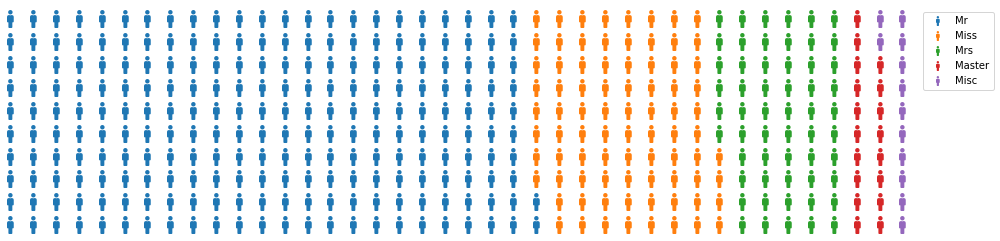

In [82]:
data = {'Mr': 232, 'Miss': 82, 'Mrs': 56, 'Master': 18, 'Misc': 12}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=40,
    values=data, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='male', icon_size=18, 
    icon_legend=True,
    figsize=(14, 18)
)

Encoding the feature manually, we can employ One Hot or Label Encoder for this task but this is done to show it can be mapped manually as well if you are not sure if encoders will perform differently on validations/test/train set.

In [78]:
#encoding
Feature1 = [df_train2, df_test2]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Misc": 5}

for dataset in Feature1:
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
    
df_train2['Title'].value_counts()

1    517
2    182
3    125
4     40
5     27
Name: Title, dtype: int64

##### Note: The major distinction between 'pd.cut & pd.qcut' is that 'qcut' will calculate the size of each bin in order to make sure the distribution of data in the bins is equal. In other words, all bins will have (roughly) the same number of observations. While 'cut' will create bins on average and each bin may have different vaulues(unequal samples).

In [84]:
pd.qcut(df_train2['Age'], 5).value_counts()

(20.0, 25.0]     258
(30.0, 40.0]     185
(0.419, 20.0]    179
(40.0, 80.0]     150
(25.0, 30.0]     119
Name: Age, dtype: int64

In [85]:
pd.qcut(df_train2['Fare'], 5).value_counts()

(7.854, 10.5]        184
(21.679, 39.688]     180
(-0.001, 7.854]      179
(39.688, 512.329]    176
(10.5, 21.679]       172
Name: Fare, dtype: int64

In [86]:
age_bin = [df_train2, df_test2]
for dataset in age_bin:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 20, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 20) & (dataset['Age'] <= 25), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 80), 'Age'] = 4


In [87]:
df_test2['Age'].value_counts()

1    146
4     85
0     69
2     62
3     56
Name: Age, dtype: int64

In [88]:
Fare_bin = [df_train2, df_test2]
for dataset in Fare_bin:
    dataset['Fare'] = dataset['Fare'].astype(int)
    dataset.loc[ dataset['Fare'] <= 7.854, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.854) & (dataset['Fare'] <= 10.5), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 10.5) & (dataset['Fare'] <= 21.679), 'Fare'] = 2
    dataset.loc[(dataset['Fare'] > 21.679) & (dataset['Fare'] <= 39.688), 'Fare'] = 3
    dataset.loc[(dataset['Fare'] > 39.688) & (dataset['Fare'] <= 513), 'Fare'] = 4

In [90]:
df_train2['Fare'].value_counts()

0    241
3    180
4    176
2    171
1    123
Name: Fare, dtype: int64

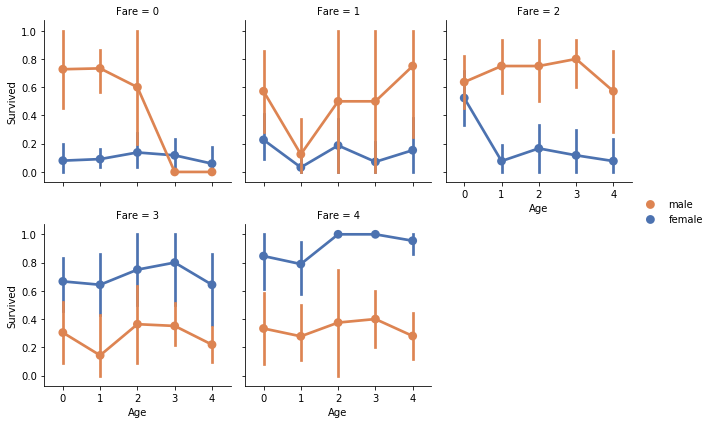

In [92]:
Fig = sns.FacetGrid(df_train2, col = 'Fare', col_wrap=3)
Fig.map(sns.pointplot, 'Age', 'Survived', 'Sex', ci=95.0, palette = 'deep')
Fig.add_legend()

##### See how a combination of multiple feature tell us details about target. We can actually create our own probabalistic model with these ratios.

In [93]:
## some learning
female_mean = df_train2[df_train2.Sex=='female'].groupby(['Sex','Pclass', 'Embarked','Fare'])['Survived'].mean()
female_mean

Sex     Pclass  Embarked  Fare
female  1       C         3       0.750000
                          4       1.000000
                Q         4       1.000000
                S         3       1.000000
                          4       0.954545
        2       C         2       1.000000
                          3       1.000000
                          4       1.000000
                Q         2       1.000000
                S         1       0.875000
                          2       0.880000
                          3       0.937500
                          4       1.000000
        3       C         0       1.000000
                          2       0.529412
                          3       1.000000
                Q         0       0.750000
                          1       0.500000
                          2       0.750000
                          3       0.666667
                S         0       0.550000
                          1       0.235294
                       

In [94]:
male_mean = df_train2[df_train2.Sex=='male'].groupby(['Sex','Pclass', 'Embarked','Fare'])['Survived'].mean()
male_mean

Sex   Pclass  Embarked  Fare
male  1       C         3       0.375000
                        4       0.423077
              Q         4       0.000000
              S         0       0.000000
                        3       0.447368
                        4       0.314286
      2       C         2       0.250000
                        3       0.200000
                        4       0.000000
              Q         2       0.000000
              S         0       0.000000
                        1       0.125000
                        2       0.155556
                        3       0.240000
                        4       0.000000
      3       C         0       0.133333
                        1       0.333333
                        2       0.500000
              Q         0       0.074074
                        1       0.000000
                        2       0.000000
                        3       0.142857
              S         0       0.104839
                        1   

In [95]:
# Creating Deck column from the first letter of the Cabin column, For Missing using M
df_train2['Deck'] = df_train2['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

df_decks = df_train2.groupby(['Deck', 'Pclass']).count().drop(columns=['Survived', 'Sex', 'Age', 'SibSp',
                                                                      'Parch','Fare', 'Embarked', 'Cabin', 'PassengerId', 
                                                                          'Ticket', 'Title']).rename(columns={'Name': 'Count'}).transpose()

In [96]:
df_decks

Deck     A   B   C   D      E        F     G   M            T
Pclass   1   1   1   1  2   1  2  3  2  3  3   1    2    3  1
Count   15  47  59  29  4  25  4  3  8  5  4  40  168  479  1

##### Since Deck T  is negligible assigning it to frequent deck value

In [98]:
deck = df_train2[df_train2['Deck'] == 'T'].index
df_train2.loc[deck, 'Deck'] = 'M'

#### waffle visual for deck

In [99]:
waf2 = {'A':15, 'B':47, 'C':59, 'D':33, 'E':32, 'F':13, 'G':4, 'M':647, 'T':1}
waf2 = pd.DataFrame(waf2.items(), columns=['Deck', 'Value'])

In [100]:
total_values = sum(waf2['Value'])
category_proportions = [(float(value) / total_values) for value in waf2['Value']]

width = 30 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

# compute the number of tiles for each catagory
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

# print out number of tiles per category
for i, tiles in enumerate(tiles_per_category):
    print (waf2.Deck.values[i] + ': ' + str(tiles))


A: 5
B: 17
C: 21
D: 12
E: 11
F: 5
G: 1
M: 228
T: 0


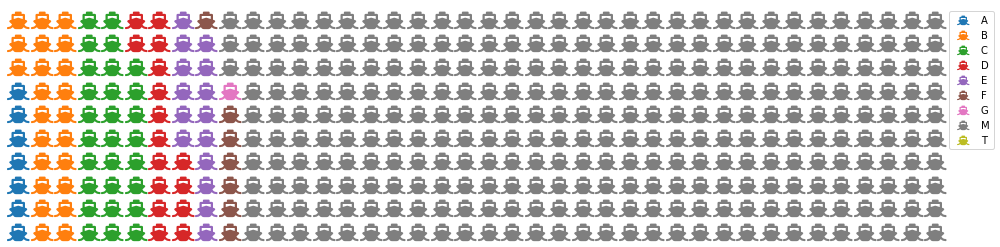

In [101]:
data = {'A':5, 'B':17, 'C':21, 'D':12, 'E':11, 'F':5, 'G':1, 'M':228, 'T':0}
fig = plt.figure(
    FigureClass=Waffle, 
    rows=10, 
    columns=40,
    values=data, 
    cmap_name="tab10",
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    icons='ship', icon_size=18, 
    icon_legend=True,
    figsize=(14, 18)
)

##### Bining Deck feature 

In [102]:
df_train2['Deck'] = df_train2['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_train2['Deck'] = df_train2['Deck'].replace(['D', 'E'], 'DE')
df_train2['Deck'] = df_train2['Deck'].replace(['F', 'G'], 'FG')

df_train2['Deck'].value_counts()

M      688
ABC    121
DE      65
FG      17
Name: Deck, dtype: int64

Same for Test dataset

In [103]:
df_test2['Deck'] = df_test2['Cabin'].apply(lambda s: s[0] if pd.notnull(s) else 'M')

dft_decks = df_test2.groupby(['Deck', 'Pclass']).count().drop(columns=['Sex', 'Age', 'SibSp',
                                                                      'Parch','Fare', 'Embarked', 'Cabin', 'PassengerId', 
                                                                          'Ticket', 'Title']).rename(columns={'Name': 'Count'}).transpose()

In [104]:
df_test2['Deck'] = df_test2['Deck'].replace(['A', 'B', 'C'], 'ABC')
df_test2['Deck'] = df_test2['Deck'].replace(['D', 'E'], 'DE')
df_test2['Deck'] = df_test2['Deck'].replace(['F', 'G'], 'FG')

df_test2['Deck'].value_counts()

M      327
ABC     60
DE      22
FG       9
Name: Deck, dtype: int64

##### Note: Here we are going to check correlation or odds of surviving with respect to all features. This will give us a boost in understanding which charcteristics of features have more importance.

In [105]:
###ckeck corr between difernt class
Target = ['Survived']
corr_cols = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare']

for corr in corr_cols:
    if df_train2[corr].dtype != 'float64' :
        print('Surviving Correlation by:',corr)
        print(df_train2[[corr, Target[0]]].groupby(corr, as_index=False).mean())
        print('-'*10, '\n')

Surviving Correlation by: Sex
      Sex  Survived
0  female  0.742038
1    male  0.188908
---------- 

Surviving Correlation by: Pclass
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
---------- 

Surviving Correlation by: Embarked
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
---------- 

Surviving Correlation by: Title
   Title  Survived
0      1  0.156673
1      2  0.697802
2      3  0.792000
3      4  0.575000
4      5  0.444444
---------- 

Surviving Correlation by: SibSp
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
---------- 

Surviving Correlation by: Parch
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
---------- 

Surviving Correlation by: Age
   Age  Survived
0    0  0.455556
1    1  0.295720
2    

##### Note: Apart from heatmaps which are used further in this notebook we can also sortout corr between different features for feature selections as highly correlated feature sometime exibit no extra information than their counterparts

In [106]:
corr_train = df_train2.drop(['PassengerId'], axis=1).corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr_train.rename(columns={"level_0": "Attribute 1", "level_1": "Attribute 2", 0: 'Correlation Coefficient'}, inplace=True)
corr_train.drop(corr_train.iloc[1::2].index, inplace=True)
corr_train1 = corr_train.drop(corr_train[corr_train['Correlation Coefficient'] == 1.0].index)

In [107]:
#Train frame correlations check
corr = corr_train1['Correlation Coefficient'] > 0.3
corr_train1[corr]

,Attribute 1,Attribute 2,Correlation Coefficient
8,Fare,Pclass,0.711312
10,Age,Pclass,0.424713
12,SibSp,Parch,0.414838
14,Title,Survived,0.414088
16,Fare,Parch,0.355411
18,Fare,SibSp,0.353955
20,Title,Fare,0.341456
22,Pclass,Survived,0.338481
24,Fare,Survived,0.320159
26,Title,Parch,0.303608


##### The only downside is we cannot track if the correlation is negative (if you want to do it, remove abs() from the code)

In [109]:
corr_test = df_test2.corr().abs().unstack().sort_values(kind="quicksort", ascending=False).reset_index()
corr_test.rename(columns={"level_0": "Feature 1", "level_1": "Feature 2", 0: 'Correlation Coefficient'}, inplace=True)
corr_test.drop(corr_test.iloc[1::2].index, inplace=True)
corr_test1 = corr_test.drop(corr_test[corr_test['Correlation Coefficient'] == 1.0].index)

In [110]:
# Test frame correlations check
corr1 = corr_test1['Correlation Coefficient'] > 0.3
corr_test1[corr1]

,Feature 1,Feature 2,Correlation Coefficient
8,Pclass,Fare,0.767822
10,Age,Pclass,0.544918
12,Age,Fare,0.353949
14,Fare,SibSp,0.345910
16,Parch,Title,0.326135
18,Parch,Fare,0.322649
20,Parch,SibSp,0.306895


##### Same as above but with heatmaps

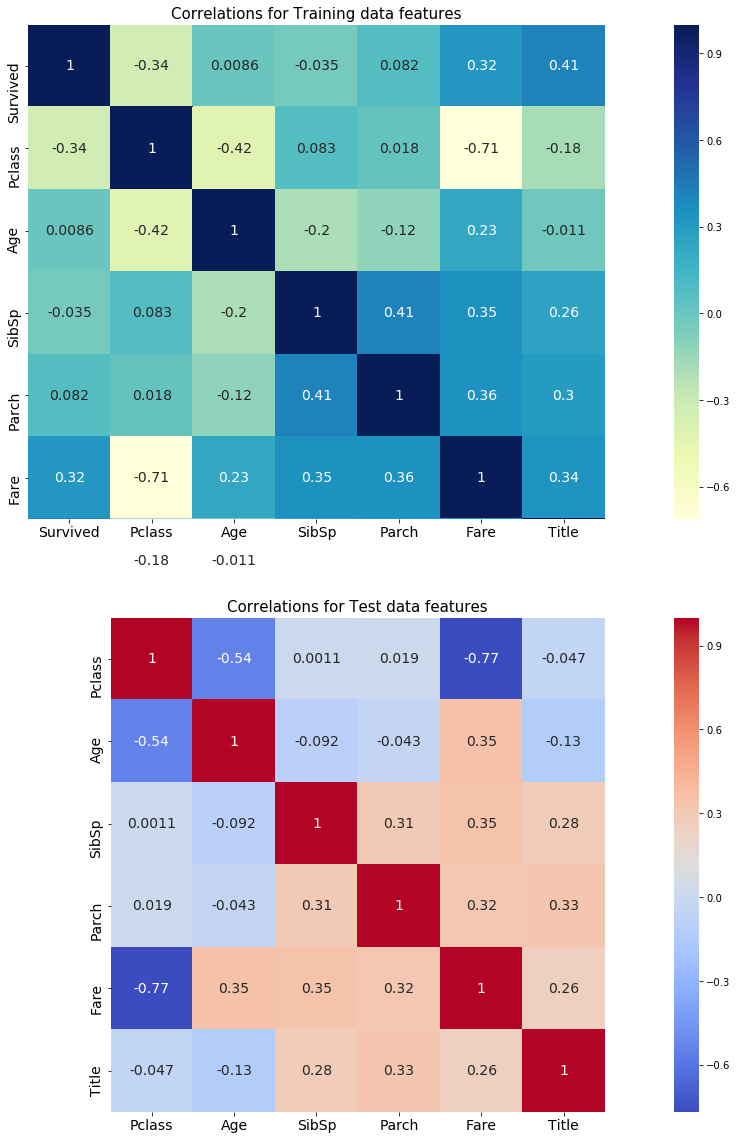

In [111]:
fig, axs = plt.subplots(nrows=2, figsize=(25, 20))

sns.heatmap(df_train2.drop(['PassengerId'], axis=1).corr(), ax=axs[0], annot=True, square=True, cmap="YlGnBu", annot_kws={'size': 14})
sns.heatmap(df_test2.drop(['PassengerId'], axis=1).corr(), ax=axs[1], annot=True, square=True, cmap='coolwarm', annot_kws={'size': 14})

for i in range(2):    
    axs[i].tick_params(axis='x', labelsize=14)
    axs[i].tick_params(axis='y', labelsize=14)
    
axs[0].set_title('Correlations for Training data features', size=15)
axs[1].set_title('Correlations for Test data features', size=15)


axs[0].set_ylim(6.0, 0)
axs[1].set_ylim(6.0, 0)
plt.show()

## Model Training and Evaluation

##### We'll use multiple model and see they behave w.r.t to training data and choose the best model to submit for the competetion

In [113]:
#Models for checking, might not use all

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier

##### Dropping Features not relevant for performace

In [114]:
df_train2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)
df_test2.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [115]:
df_train2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,0,3,male,1,1,0,0,S,1,M
1,1,1,female,3,1,0,4,C,3,ABC
2,1,3,female,2,0,0,0,S,2,M
3,1,1,female,3,1,0,4,S,3,ABC
4,0,3,male,3,0,0,1,S,1,M


In [116]:
df_test2.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,3,male,3,0,0,0,Q,1.0,M
1,3,female,4,1,0,0,S,3.0,M
2,2,male,4,0,0,1,Q,1.0,M
3,3,male,2,0,0,1,S,1.0,M
4,3,female,1,1,1,2,S,3.0,M


In [117]:
from sklearn.preprocessing import LabelEncoder

##### LabelEncoder:  
##### can turn [dog,cat,dog,mouse,cat] into [1,2,1,3,2], but then the imposed ordinality means that the average of dog and mouse is cat. Still there are algorithms like decision trees and random forests that can work with categorical variables just fine and LabelEncoder can be used to store values using less disk space.

##### One-Hot-Encoding:   
##### has the advantage that the result is binary rather than ordinal and that everything sits in an orthogonal vector space. The disadvantage is that for high cardinality, the feature space can really blow up quickly and you start fighting with the curse of dimensionality. In these cases, I typically employ one-hot-encoding followed by PCA for dimensionality reduction. I find that the judicious combination of one-hot plus PCA can seldom be beat by other encoding schemes. PCA finds the linear overlap, so will naturally tend to group similar features into the same feature.

In [118]:
class FeatureEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode
    
    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

To avoid encoding feature by feautre we employ above method which is written With help of : https://stackoverflow.com/questions/24458645/label-encoding-across-multiple-columns-in-scikit-learn

In [119]:
df_tr = df_train2.copy()
df_tr = FeatureEncoder(columns = ['Sex','Embarked', 'Deck']).fit_transform(df_tr)

In [120]:
df_te = df_test2.copy()
df_te = FeatureEncoder(columns = ['Sex','Embarked', 'Deck']).fit_transform(df_te)

In [121]:
df_te.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Deck
0,3,1,3,0,0,0,1,1.0,3
1,3,0,4,1,0,0,2,3.0,3
2,2,1,4,0,0,1,1,1.0,3
3,3,1,2,0,0,1,2,1.0,3
4,3,0,1,1,1,2,2,3.0,3


In [122]:
df_tr.dtypes

Survived    int64
Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
Title       int64
Deck        int64
dtype: object

In [123]:
df_te = df_te.astype(int)
df_te.dtypes

Pclass      int64
Sex         int64
Age         int64
SibSp       int64
Parch       int64
Fare        int64
Embarked    int64
Title       int64
Deck        int64
dtype: object

##### Splitting target and features

##### iLoc : iloc returns a Pandas Series when one row is selected, and a Pandas DataFrame when multiple rows are selected, or if any column in full is selected   

whereas,  

##### Loc : loc is label-based, which means that you have to specify rows and columns based on their row and column labels


In [124]:
x_train = df_tr.iloc[:,1:]
y_train = df_tr.iloc[:,:1]

In [125]:
x_test = df_te.copy()

In [126]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer

##### pipelines are set up with the fit/transform/predict functionality, so that we can fit the whole pipeline to the training data and transform to the test data without having to do it individually for everything

##### PowerTransformer provides non-linear transformations in which data is mapped to a normal distribution to stabilize variance and minimize skewness.

In [127]:
#start with PF of degree 3 then we will check till 5 if efficieny increase else we will leave it
pr=PolynomialFeatures(degree=3)
z = pr.fit_transform(x_train)
z.shape

(891, 220)

##### Notice how applying Polynomial featuring have increase dimensions/variables to the equation

##### One more thing to make note of is the higher in terms of 'degree' you go in Polynomial the the more feature it will create and you might end up breaking your code, so it is better to add a break for this model

In [128]:
Input=[('scale',PowerTransformer()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LogisticRegression())]
pipe=Pipeline(Input)
pipe.fit(x_train,y_train)
lr_score = round(pipe.score(x_train, y_train) * 100, 2)
print("score:", lr_score, "%")

score: 84.06 %


In [129]:
decision_tree = DecisionTreeClassifier(criterion='entropy', splitter='random') 
decision_tree.fit(x_train, y_train)  
dt_pred = decision_tree.predict(x_test)  
dt_score = round(decision_tree.score(x_train, y_train) * 100, 2)
print("score:", dt_score, "%")

score: 91.69 %


In [131]:
knn = KNeighborsClassifier(n_neighbors = 5) 
knn.fit(x_train, y_train)  
knn_pred = knn.predict(x_test)  
knn_score1 = round(knn.score(x_train, y_train) * 100, 2)
print("score:", knn_score1, "%")

score: 86.08 %


In [132]:
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(x_train, y_train)  
knn_pred = knn.predict(x_test)  
knn_score = round(knn.score(x_train, y_train) * 100, 2)
print("score:", knn_score, "%")

score: 87.54 %


In [133]:
# Random Forest
random_forest = RandomForestClassifier(criterion = "gini", 
                                       min_samples_leaf = 1, 
                                       min_samples_split = 10,   
                                       n_estimators=100, 
                                       max_features='auto', 
                                       oob_score=True, 
                                       random_state=1, 
                                       n_jobs=-1)

random_forest.fit(x_train, y_train)
rf_pred = random_forest.predict(x_test)

rf_score = round(random_forest.score(x_train, y_train) * 100, 2)
print("score:", rf_score, "%")

score: 88.22 %


In [134]:
from sklearn import svm
from sklearn.svm import SVC

model = svm.SVC(C=1, kernel='poly', random_state=0, gamma = 'auto', degree = 5)
model.fit(x_train, y_train)
svm_pred = model.predict(x_test)
svm_score = round(model.score(x_train, y_train) * 100, 2)
print("score:", svm_score, "%")

score: 89.56 %


In [135]:
clf = XGBClassifier()
clf.fit(x_train, y_train, eval_metric='auc', verbose=True)
xgb_pred = clf.predict(x_test)
xgb_score = round(clf.score(x_train, y_train) * 100, 2)
print("score:", xgb_score, "%")

score: 91.13 %


In [136]:
clf1 = XGBClassifier(booster='dart', min_split_loss = 1, max_depth= 7)
clf1.fit(x_train, y_train, eval_metric='auc', verbose=True)
xgb_pred = clf1.predict(x_test)
xgb1_score = round(clf.score(x_train, y_train) * 100, 2)
print("score:", xgb1_score, "%")

score: 91.13 %


In [137]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(x_train, y_train)

percep_pred = perceptron.predict(x_test)

percep_score = round(perceptron.score(x_train, y_train) * 100, 2)
print("score:", percep_score, "%")

score: 77.55 %


In [138]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train)  
nb_pred = gaussian.predict(x_test)  
nb_score = round(gaussian.score(x_train, y_train) * 100, 2)
print("score:", nb_score, "%")

score: 77.78 %


##### Adding all model performance in a single df

In [139]:
#area for Model Score visual
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN_3 ', 'KNN_5', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 'XGB Classifier',
              'Decision Tree'],
    'Score': [svm_score, knn_score, knn_score1, lr_score, 
              rf_score, nb_score, percep_score, xgb_score, dt_score]})
result_df = results.sort_values(by='Score', ascending=False)
#result_df = result_df.set_index('Score')
result_df.head(9)

,Model,Score
8,Decision Tree,91.69
7,XGB Classifier,91.13
0,Support Vector Machines,89.56
4,Random Forest,88.22
1,KNN_3,87.54
2,KNN_5,86.08
3,Logistic Regression,84.06
5,Naive Bayes,77.78
6,Perceptron,77.55


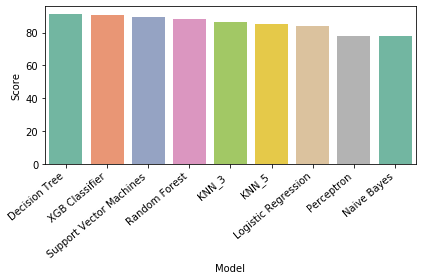

In [156]:
ax = sns.barplot(x="Model", y="Score", data=result_df, palette="Set2")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [140]:
#area for feature importance visual
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(9)

,importance
feature,
Title,0.285
Sex,0.213
Pclass,0.118
Fare,0.091
Age,0.079
Deck,0.071
SibSp,0.065
Embarked,0.040
Parch,0.038


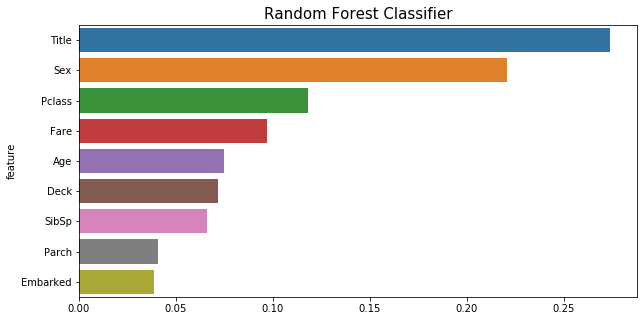

In [143]:
plt.figure(figsize=(10, 5))
sns.barplot(x='Importance', y=importances.index, data=importances)

plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.title('Random Forest Classifier', size=15)

plt.show()

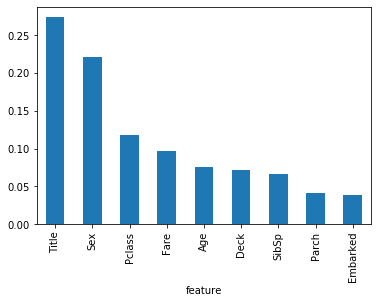

In [144]:
importances['importance'].plot.bar()

### Predict probabilty via NaiveBayes and Decision Tree

##### predict_proba gives you the probabilities for the target (0 and 1 in our case) in array form. The number of probabilities for each row is equal to the number of categories in target variable

##### This is a very powerful function of NaiveBayes and Decision Tree (also employed in Random Forest, XGB and so on). Having a strong understanding of probablities and distribution functions combine with with this may beat some of the top models. If you can somehow work on probablities that are in range of 0.4-0.6 which are the real problem for model and create your function/layer between models say: Naive Bayes -> Your Function -> New features -> XGB/LightGBM might actually perform exceptionally well. 
##### If you want to get going with this i recommed read about probablities and distributions functions

In [141]:
nb_p = gaussian.predict_proba(x_train)

In [142]:
nb_p[0]

array([0.9927468, 0.0072532])

In [146]:
prob_nb = pd.DataFrame(nb_p, columns=['Prob_NotSurvived', 'Prob_Survived']) 

In [147]:
prob_nb.head()

,Prob_NotSurvived,Prob_Survived
0,0.992747,0.007253
1,0.000036,0.999964
2,0.575773,0.424227
3,0.000178,0.999822
4,0.986490,0.013510


In [148]:
pd.cut(prob_nb['Prob_NotSurvived'], 5).value_counts()

(0.8, 1.0]          441
(-0.000998, 0.2]    291
(0.2, 0.4]           72
(0.4, 0.6]           67
(0.6, 0.8]           20
Name: Prob_NotSurvived, dtype: int64

In [149]:
## lets probability which may be cuasing issue for classifier ie .41 to 0.59
prob_issue = prob_nb[prob_nb['Prob_NotSurvived']>=0.41]

In [150]:
prob_issue = prob_issue[prob_issue['Prob_NotSurvived']<=0.59]

In [151]:
prob_issue.head()

,Prob_NotSurvived,Prob_Survived
2,0.575773,0.424227
14,0.563818,0.436182
28,0.463286,0.536714
32,0.463286,0.536714
44,0.451837,0.548163


#### see how this will effect model performace, even humans will have issue with such odds :D

In [152]:
dfp = decision_tree.predict_proba(x_train)

In [153]:
prob_dt = pd.DataFrame(dfp, columns=['Prob_NotSurvived', 'Prob_Survived'])

In [155]:
pd.cut(prob_dt['Prob_NotSurvived'], 5).value_counts()

(0.8, 1.0]       469
(-0.001, 0.2]    269
(0.6, 0.8]        86
(0.4, 0.6]        48
(0.2, 0.4]        19
Name: Prob_NotSurvived, dtype: int64

##### we can further join index with orignal dataframe to check where on which features our Naive Bayes and decision tree model is having issue and with further analysis we can tune our model better but this will be out of scope for this notebook.

In [157]:
#then end at df test pred

df_submit = pd.DataFrame(columns=['PassengerId', 'Survived'])
df_submit['PassengerId'] = test_frame['PassengerId']
df_submit['Survived'] = dt_pred
df_submit.to_csv('submit01.csv', header=True, index=False)


##### Lastly, there are tonnes of options I didn't discuss here, some of the prominent are Cross Validations, Grid Seacrh for paramters tuning, PCA. But remember that they are also essential part of any ML project.

##### Feel free to contact me here or at : https://www.linkedin.com/in/muhammad-saad-31740060/